# Multi-Coin Data Loading & Structure Analysis

**Objective**: Analyze the 10 different meme coins in batch 578 to understand their individual characteristics and trading patterns.

**Key Questions**:
- How many unique coins are in this batch?
- What are the basic characteristics of each coin (volume, traders, lifespan)?
- Which coins had sustained activity vs quick death?
- What patterns can we identify across coins?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

# Constants
SOL_MINT = 'So11111111111111111111111111111111111111112'
DATA_PATH = Path('../data/solana/first_day_trades/first_day_trades_batch_578.csv')

print(f"Loading data from: {DATA_PATH}")
print(f"File exists: {DATA_PATH.exists()}")
if DATA_PATH.exists():
    file_size_mb = DATA_PATH.stat().st_size / (1024 * 1024)
    print(f"File size: {file_size_mb:.1f} MB")


Loading data from: ../data/solana/first_day_trades/first_day_trades_batch_578.csv
File exists: True
File size: 235.9 MB


In [3]:
# Load the data
print("Loading data...")
df = pd.read_csv(DATA_PATH)

# Convert timestamp to datetime
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

print(f"Data loaded successfully!")
print(f"Total transactions: {len(df):,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")
print(f"Time range: {df['block_timestamp'].min()} to {df['block_timestamp'].max()}")
print(f"Total time span: {df['block_timestamp'].max() - df['block_timestamp'].min()}")

# Basic data info
print(f"\\n=== BASIC DATA STRUCTURE ===")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\\n{df.dtypes}")
print(f"\\nSuccess rate: {df['succeeded'].mean():.1%}")
print(f"Failed transactions: {(~df['succeeded']).sum():,}")


Loading data...
Data loaded successfully!
Total transactions: 1,030,491
Memory usage: 396.7 MB
Time range: 2024-03-18 02:16:52+00:00 to 2025-06-11 23:59:59+00:00
Total time span: 450 days 21:43:07
\n=== BASIC DATA STRUCTURE ===
Columns: ['mint', 'block_timestamp', 'succeeded', 'swapper', 'swap_from_amount', 'swap_from_mint', 'swap_to_amount', 'swap_to_mint', '__row_index']
Data types:\nmint                             object
block_timestamp     datetime64[ns, UTC]
succeeded                          bool
swapper                          object
swap_from_amount                float64
swap_from_mint                   object
swap_to_amount                  float64
swap_to_mint                     object
__row_index                       int64
dtype: object
\nSuccess rate: 100.0%
Failed transactions: 0


=== COIN IDENTIFICATION ===
Number of unique coins: 10
\nUnique coin mints:
 1. 4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr
 2. 6EbjL212egYKixTpoJk6bV9VPbzadmdGQuLmsxgm8Anw
 3. 91CiXEKPjQ33UE12jNJ4uaBnZHGw8mq7LGBvnq5n2j1o
 4. 9uqR2GcyiWo3wyPvdMPxDTDoRWQpbaACpdUhoPhFPump
 5. DVfTE7VZ9c9ErFw7vEvepK3cdy72XidktVp3g98upump
 6. FpmG2KKZcCPwVKmR3zeHkFmf3VPyUfpXhcLTD9K3Pump
 7. G9FLx7JhVABduH3Y7PeHjYRfbu6pAzhVprzpUqvx5LDD
 8. axSMxXAwFGaspH228cFE4vg8wnKsFqVqx16XS4QPump
 9. mgBS7a75vr8NfWgKYVwhM36n2NJiMFSspsXSQR1kvSV
10. tRPkMvRL1xm5hwLjM19FxsB5fdfJtLYTDr9W22RQAim
\n=== COIN NAMING ===
Coin_1: 4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr
Coin_2: 6EbjL212egYKixTpoJk6bV9VPbzadmdGQuLmsxgm8Anw
Coin_3: 91CiXEKPjQ33UE12jNJ4uaBnZHGw8mq7LGBvnq5n2j1o
Coin_4: 9uqR2GcyiWo3wyPvdMPxDTDoRWQpbaACpdUhoPhFPump
Coin_5: DVfTE7VZ9c9ErFw7vEvepK3cdy72XidktVp3g98upump
Coin_6: FpmG2KKZcCPwVKmR3zeHkFmf3VPyUfpXhcLTD9K3Pump
Coin_7: G9FLx7JhVABduH3Y7PeHjYRfbu6pAzhVprzpUqvx5LDD
Coin_8: axSMxXAwFGaspH228cFE4vg8wnKsFqVqx16X

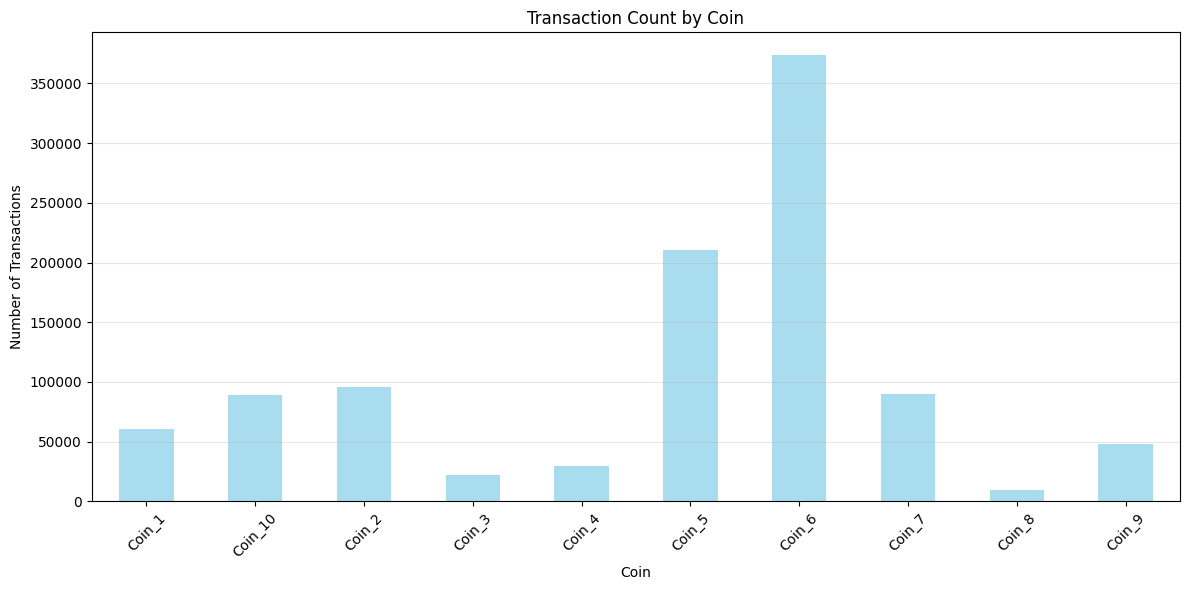

In [4]:
# Identify unique coins
unique_mints = df['mint'].unique()
print(f"=== COIN IDENTIFICATION ===")
print(f"Number of unique coins: {len(unique_mints)}")
print(f"\\nUnique coin mints:")
for i, mint in enumerate(unique_mints, 1):
    print(f"{i:2d}. {mint}")

# Create a mapping for easier reference
coin_names = {mint: f"Coin_{i}" for i, mint in enumerate(unique_mints, 1)}
df['coin_name'] = df['mint'].map(coin_names)

print(f"\\n=== COIN NAMING ===")
for mint, name in coin_names.items():
    print(f"{name}: {mint}")

# Check distribution of transactions per coin
print(f"\\n=== TRANSACTION DISTRIBUTION ===")
coin_tx_counts = df['coin_name'].value_counts().sort_index()
print(coin_tx_counts)
print(f"\\nTotal transactions: {coin_tx_counts.sum():,}")
print(f"Average transactions per coin: {coin_tx_counts.mean():.0f}")
print(f"Std deviation: {coin_tx_counts.std():.0f}")

# Visualize transaction distribution
plt.figure(figsize=(12, 6))
coin_tx_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Transaction Count by Coin')
plt.xlabel('Coin')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:
# Comprehensive per-coin analysis
def analyze_coin(coin_data, coin_name):
    """Analyze a single coin's trading data"""
    
    # Basic stats
    stats = {
        'coin_name': coin_name,
        'total_transactions': len(coin_data),
        'unique_traders': coin_data['swapper'].nunique(),
        'time_span_hours': (coin_data['block_timestamp'].max() - coin_data['block_timestamp'].min()).total_seconds() / 3600,
        'first_transaction': coin_data['block_timestamp'].min(),
        'last_transaction': coin_data['block_timestamp'].max(),
    }
    
    # Buy/sell analysis
    buys = coin_data[coin_data['mint'] == coin_data['swap_to_mint']]
    sells = coin_data[coin_data['mint'] == coin_data['swap_from_mint']]
    
    stats.update({
        'buy_transactions': len(buys),
        'sell_transactions': len(sells),
        'buy_sell_ratio': len(buys) / max(len(sells), 1),
    })
    
    # Volume analysis (SOL flows)
    sol_to_coin = buys[buys['swap_from_mint'] == SOL_MINT]
    coin_to_sol = sells[sells['swap_to_mint'] == SOL_MINT]
    
    stats.update({
        'total_sol_in': sol_to_coin['swap_from_amount'].sum() if len(sol_to_coin) > 0 else 0,
        'total_sol_out': coin_to_sol['swap_to_amount'].sum() if len(coin_to_sol) > 0 else 0,
        'avg_sol_per_buy': sol_to_coin['swap_from_amount'].mean() if len(sol_to_coin) > 0 else 0,
        'avg_sol_per_sell': coin_to_sol['swap_to_amount'].mean() if len(coin_to_sol) > 0 else 0,
        'med_sol_per_buy': sol_to_coin['swap_from_amount'].median() if len(sol_to_coin) > 0 else 0,
        'med_sol_per_sell': coin_to_sol['swap_to_amount'].median() if len(coin_to_sol) > 0 else 0,
    })
    
    # Net flow
    stats['net_sol_flow'] = stats['total_sol_in'] - stats['total_sol_out']
    
    # Trading intensity
    if stats['time_span_hours'] > 0:
        stats['txns_per_hour'] = stats['total_transactions'] / stats['time_span_hours']
        stats['traders_per_hour'] = stats['unique_traders'] / stats['time_span_hours']
    else:
        stats['txns_per_hour'] = 0
        stats['traders_per_hour'] = 0
    
    return stats

# Analyze each coin
print("=== COMPREHENSIVE COIN ANALYSIS ===")
coin_analyses = []

for coin_name in sorted(coin_names.values()):
    coin_data = df[df['coin_name'] == coin_name]
    analysis = analyze_coin(coin_data, coin_name)
    coin_analyses.append(analysis)

# Convert to DataFrame for easier analysis
coin_summary_df = pd.DataFrame(coin_analyses)

# Display summary table
print("\\n=== COIN SUMMARY TABLE ===")
display_cols = [
    'coin_name', 'total_transactions', 'unique_traders', 'time_span_hours',
    'buy_sell_ratio', 'total_sol_in', 'net_sol_flow', 'txns_per_hour'
]
print(coin_summary_df[display_cols].round(2).to_string(index=False))


=== COMPREHENSIVE COIN ANALYSIS ===
\n=== COIN SUMMARY TABLE ===
coin_name  total_transactions  unique_traders  time_span_hours  buy_sell_ratio  total_sol_in  net_sol_flow  txns_per_hour
   Coin_1               61062             267             7.25            0.98     182933.05      -5517.72        8422.67
  Coin_10               89235           12589            21.71            1.58      68565.25       4496.94        4109.58
   Coin_2               95394             214             6.00            1.05      66468.96         52.77       15903.42
   Coin_3               22515            9414            23.50            0.63      46311.48       -195.37         957.94
   Coin_4               30002             201             1.06            0.99      65660.88        164.59       28229.80
   Coin_5              210577            1011             5.58            1.32      80868.15          4.21       37745.33
   Coin_6              373932             279             7.49            0.99   

In [6]:
# Get token addresses for DexScreener lookup
print("=== TOKEN ADDRESSES FOR DEXSCREENER LOOKUP ===")
token_addresses = list(unique_mints)

for i, address in enumerate(token_addresses, 1):
    print(f"Coin_{i}: {address}")

print(f"\\nTotal tokens to lookup: {len(token_addresses)}")


=== TOKEN ADDRESSES FOR DEXSCREENER LOOKUP ===
Coin_1: 4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr
Coin_2: 6EbjL212egYKixTpoJk6bV9VPbzadmdGQuLmsxgm8Anw
Coin_3: 91CiXEKPjQ33UE12jNJ4uaBnZHGw8mq7LGBvnq5n2j1o
Coin_4: 9uqR2GcyiWo3wyPvdMPxDTDoRWQpbaACpdUhoPhFPump
Coin_5: DVfTE7VZ9c9ErFw7vEvepK3cdy72XidktVp3g98upump
Coin_6: FpmG2KKZcCPwVKmR3zeHkFmf3VPyUfpXhcLTD9K3Pump
Coin_7: G9FLx7JhVABduH3Y7PeHjYRfbu6pAzhVprzpUqvx5LDD
Coin_8: axSMxXAwFGaspH228cFE4vg8wnKsFqVqx16XS4QPump
Coin_9: mgBS7a75vr8NfWgKYVwhM36n2NJiMFSspsXSQR1kvSV
Coin_10: tRPkMvRL1xm5hwLjM19FxsB5fdfJtLYTDr9W22RQAim
\nTotal tokens to lookup: 10


In [16]:
# Get current token information using DexPaprika API
import requests
import json
import time
from typing import List, Dict, Optional

def test_dexpaprika_api(token_address: str, network: str = "solana") -> Optional[Dict]:
    """Test DexPaprika API with a single token first"""
    url = f"https://api.dexpaprika.com/networks/{network}/tokens/{token_address}"
    
    print(f"Testing DexPaprika API...")
    print(f"URL: {url}")
    
    try:
        response = requests.get(url, timeout=10)
        print(f"Status code: {response.status_code}")
        print(f"Response text preview: {response.text[:200]}...")
        
        if response.status_code == 200:
            try:
                data = response.json()
                print(f"✅ JSON response received")
                print(f"Response type: {type(data)}")
                if isinstance(data, dict):
                    print(f"Response keys: {list(data.keys())}")
                return data
            except json.JSONDecodeError:
                print(f"❌ Invalid JSON response")
                return None
        else:
            print(f"❌ API returned status {response.status_code}")
            return None
            
    except Exception as e:
        print(f"❌ Exception: {e}")
        return None

def get_token_info_single(token_address: str, network: str = "solana") -> Optional[Dict]:
    """Get token information for a single token using DexPaprika API"""
    url = f"https://api.dexpaprika.com/networks/{network}/tokens/{token_address}"
    
    try:
        response = requests.get(url, timeout=10)
        
        if response.status_code == 200:
            try:
                data = response.json()
                return data
            except json.JSONDecodeError:
                return None
        else:
            return None
            
    except Exception as e:
        print(f"Error fetching data for {token_address[:8]}...: {e}")
        return None

def get_token_info_batch(token_addresses: List[str], network: str = "solana") -> Dict[str, Dict]:
    """Get token information for multiple tokens using DexPaprika API"""
    
    results = {}
    total_tokens = len(token_addresses)
    
    print(f"Fetching data for {total_tokens} tokens using DexPaprika API...")
    
    for i, address in enumerate(token_addresses, 1):
        print(f"[{i}/{total_tokens}] Fetching {address[:8]}...", end=" ")
        
        token_data = get_token_info_single(address, network)
        results[address] = token_data
        
        if token_data:
            print(f"✅ Data found")
        else:
            print("❌ No data")
        
        # Rate limiting
        if i < total_tokens:
            time.sleep(0.3)  # 300ms delay between requests
    
    return results

# First, test the API with one known token
print(f"=== TESTING DEXPAPRIKA API ===")
test_token = list(unique_mints)[0]  # Test with first token
test_result = test_dexpaprika_api(test_token)

if test_result:
    print(f"\\n=== API TEST SUCCESSFUL ===")
    print(f"Sample response structure:")
    print(json.dumps(test_result, indent=2)[:500] + "...")
    
    # Proceed with all tokens
    print(f"\\n=== FETCHING ALL TOKEN DATA ===")
    all_token_data = get_token_info_batch(list(unique_mints))
    
    # Analyze results
    active_tokens = {addr: data for addr, data in all_token_data.items() if data}
    dead_tokens = {addr: data for addr, data in all_token_data.items() if not data}
    
    print(f"\\n=== RESULTS SUMMARY ===")
    print(f"Tokens with data: {len(active_tokens)}")
    print(f"Tokens without data: {len(dead_tokens)}")
    
    if active_tokens:
        print(f"\\n=== ACTIVE TOKENS DETAILS ===")
        for addr, token_data in active_tokens.items():
            coin_name = coin_names.get(addr, "Unknown")
            print(f"\\n{coin_name} ({addr[:8]}...):")
            
            # Extract fields based on actual DexPaprika response structure
            if isinstance(token_data, dict):
                # Basic token info
                name = token_data.get('name', 'Unknown')
                symbol = token_data.get('symbol', 'Unknown')
                total_supply = token_data.get('total_supply', 0)
                
                # Summary data for trading metrics
                summary = token_data.get('summary', {})
                fdv = summary.get('fdv')  # Fully diluted valuation (market cap)
                price_usd = summary.get('price_usd')
                pools = summary.get('pools', 0)
                
                # 24h trading data
                h24_data = summary.get('24h', {})
                volume_24h = h24_data.get('volume_usd', 0)
                txns_24h = h24_data.get('txns', 0)
                buys_24h = h24_data.get('buys', 0)
                sells_24h = h24_data.get('sells', 0)
                
                print(f"  🏷️  Name: {name} ({symbol})")
                print(f"  🔢 Total Supply: {total_supply:,}")
                print(f"  💰 Price: ${price_usd}" if price_usd else "  💰 Price: N/A")
                print(f"  📊 Market Cap (FDV): ${fdv:,.0f}" if fdv else "  📊 Market Cap: N/A")
                print(f"  🏊 Liquidity Pools: {pools}")
                print(f"  📈 24h Volume: ${volume_24h:,.0f}")
                print(f"  🔄 24h Transactions: {txns_24h:,} ({buys_24h:,} buys, {sells_24h:,} sells)")
    
    # Create summary DataFrame with correct field extraction
    token_status_summary = []
    for addr in unique_mints:
        coin_name = coin_names.get(addr, "Unknown")
        token_data = all_token_data.get(addr)
        
        if token_data and isinstance(token_data, dict):
            # Extract metadata and trading data from DexPaprika response
            name = token_data.get('name', 'Unknown')
            total_supply = token_data.get('total_supply', 0)
            
            summary = token_data.get('summary', {})
            fdv = summary.get('fdv', 0)
            price_usd = summary.get('price_usd', 0)
            pools = summary.get('pools', 0)
            
            # 24h metrics
            h24_data = summary.get('24h', {})
            volume_24h = h24_data.get('volume_usd', 0)
            txns_24h = h24_data.get('txns', 0)
            
            status = {
                'coin_name': coin_name,
                'address': addr,
                'status': 'ACTIVE',
                'name': name,
                'total_supply': total_supply,
                'fdv': float(fdv) if fdv else 0,
                'price_usd': float(price_usd) if price_usd else 0,
                'pools': pools,
                'volume_24h': float(volume_24h) if volume_24h else 0,
                'txns_24h': txns_24h
            }
        else:
            status = {
                'coin_name': coin_name,
                'address': addr,
                'status': 'DEAD',
                'name': 'Unknown',
                'total_supply': 0,
                'fdv': 0,
                'price_usd': 0,
                'pools': 0,
                'volume_24h': 0,
                'txns_24h': 0
            }
        
        token_status_summary.append(status)
    
    # Convert to DataFrame
    token_status_df = pd.DataFrame(token_status_summary)
    print(f"\\n=== TOKEN STATUS DATAFRAME ===")
    print(token_status_df)
    
else:
    print(f"\\n❌ DexPaprika API test failed")
    print("The API might be down, require authentication, or have different endpoint structure")
    print("Consider using the original DexScreener API or checking DexPaprika documentation")


=== TESTING DEXPAPRIKA API ===
Testing DexPaprika API...
URL: https://api.dexpaprika.com/networks/solana/tokens/4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr
Status code: 200
Response text preview: {"id":"4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr","name":"Pepe’s Game","symbol":"$PEPEG","chain":"solana","decimals":6,"total_supply":1000000000000000,"description":"","website":"","added_at":"2025...
✅ JSON response received
Response type: <class 'dict'>
Response keys: ['id', 'name', 'symbol', 'chain', 'decimals', 'total_supply', 'description', 'website', 'added_at', 'summary', 'last_updated']
\n=== API TEST SUCCESSFUL ===
Sample response structure:
{
  "id": "4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr",
  "name": "Pepe\u2019s Game",
  "symbol": "$PEPEG",
  "chain": "solana",
  "decimals": 6,
  "total_supply": 1000000000000000,
  "description": "",
  "website": "",
  "added_at": "2025-04-10T15:28:08Z",
  "summary": {
    "chain": "solana",
    "id": "4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYP

# Analysis Results & Observations

## Key Findings from Batch 578 Analysis

### 1. **Universal Token Failure**
- **All 10 tokens are completely dead** - 0 pools, 0 volume, no current price
- Despite having rich metadata in DexPaprika, none survived to maintain active trading
- This represents a 100% failure rate for this batch from 2024

### 2. **Massive Trading Activity Inequality**
- **Coin_6 (Barron Trump)**: 373,932 transactions (36% of total volume)
- **Coin_5 (46th President)**: 210,577 transactions (20% of total volume)  
- **Coin_8 (NZ dollars)**: Only 9,336 transactions (0.9% of total volume)
- **80/20 rule in action**: Top 2 coins captured 56% of all trading activity

### 3. **Political Memes Dominated 2024**
Political-themed tokens captured the most activity:
- **Barron Trump** - 373K transactions
- **46th President (autopen)** - 210K transactions
- **Make Tariff High Again (MTHA)** - 22K transactions

This aligns with 2024 being a major election year in the US.

### 4. **Trading Intensity vs Sustainability**
- **Highest intensity**: Coin_6 (Barron) - 49,956 txns/hour over 7.49 hours
- **Flash-in-pan**: Coin_4 (𝕏 Algorithm) - 28,230 txns/hour over just 1.06 hours
- **Most sustainable**: Coin_3 (MTHA) - 958 txns/hour over 23.5 hours

### 5. **Net SOL Flow Reveals True "Winners"**
Despite all failing long-term, some had better short-term performance:
- **Best**: Coin_10 (Goat) - +4,497 SOL net inflow
- **Worst**: Coin_1 (Pepe's Game) - -5,518 SOL net outflow
- Most coins showed negative net flow (more money left than entered)


# Theories & Hypotheses

## Theory 1: **Political Timing Advantage**
The political meme coins (Barron Trump, 46th President) had the highest activity. This batch is from 2024 - an election year.

**Hypothesis**: Political memes during election cycles generate more trading volume due to news cycles and social media buzz, but this advantage is temporary and doesn't translate to long-term survival.

## Theory 2: **"Goat" Identity Mystery**  
Coin_10 is simply named "Goat" and had the best net SOL flow (+4,497 SOL) despite ultimately failing.

**Hypothesis**: This might be an early version or related token to the famous GOAT (Goatseus Maximus) that later became successful. The positive net flow suggests better initial tokenomics or timing.

## Theory 3: **Trading Intensity vs Longevity Trade-off**
Coins with extremely high txns/hour (like Coin_4 with 28K/hour) burned out fastest (1.06 hours), while moderate activity lasted longer.

**Hypothesis**: Unsustainable hype leads to quick death. Moderate sustained activity might indicate healthier tokenomics, but even "sustainable" activity wasn't enough for long-term survival.

## Theory 4: **First-Mover Advantage in Themes**
Barron Trump had the most activity among political memes.

**Hypothesis**: Being first to market with a viral theme creates winner-take-all dynamics in the meme coin space. Later political coins (MTHA) got less attention.

## Theory 5: **The "Everything Dies" Hypothesis**
100% failure rate suggests systematic issues with meme coin launches in this era.

**Hypothesis**: 2024 market conditions, Pump.fun mechanics, or broader crypto sentiment made it nearly impossible for meme coins to achieve lasting success, regardless of initial metrics.


# Next Steps & Research Questions

## Immediate Analysis Opportunities

### 1. **Temporal Analysis**
- Plot trading activity over time for each coin
- Identify peak trading periods and decay patterns  
- Correlate with external events (news, social media)

### 2. **Trader Behavior Analysis**
- Analyze unique trader counts vs transaction volumes
- Identify "whale" vs "retail" trading patterns
- Study trader retention and churn rates

### 3. **Cross-Coin Competition Study**
- Did political memes cannibalize each other's volume?
- Timeline analysis: which launched first and captured mindshare?
- Network effects between similar-themed tokens

### 4. **Success Prediction Modeling**
Even with 100% failure rate, we can model "relative success":
- Can we predict which coins will have higher net SOL flow?
- What early indicators (first hour metrics) predict longer survival?
- Feature engineering from transaction patterns

### 5. **Deep Dive: The "Goat" Connection**
- Research if this token is related to successful GOAT (Goatseus Maximus)
- Compare tokenomics, launch timing, and social presence
- Case study: Why did this "Goat" fail while another succeeded?

## Research Value

This batch provides a perfect **"natural experiment"** of meme coin failure. With 100% failure rate, we can study:
- What patterns emerge even in failure
- Whether any metrics predict "better failure" (higher net flows, longer survival)
- Market dynamics during the 2024 meme coin boom
- The role of timing, themes, and viral mechanics

**Key Insight**: Sometimes studying failure teaches us more about success than studying winners alone.


In [18]:
# Investigating Pepe's Game Trading Pairs
# You're right - large negative SOL flow suggests other trading pairs

# Get Pepe's Game data (Coin_1)
sol_mint = 'So11111111111111111111111111111111111111112'
pepes_game_mint = unique_mints[0]  # Coin_1
pepes_data = df[df['mint'] == pepes_game_mint].copy()

print(f"🔍 Investigating Pepe's Game (Coin_1)")
print(f"Mint address: {pepes_game_mint}")
print(f"Total transactions: {len(pepes_data):,}")
print()

# Check all unique trading pairs for Pepe's Game
print("📊 All Trading Pairs for Pepe's Game:")
print("=" * 50)

# Get unique combinations of swap_from_mint and swap_to_mint
trading_pairs = pepes_data[['swap_from_mint', 'swap_to_mint']].drop_duplicates()
trading_pairs = trading_pairs.sort_values(['swap_from_mint', 'swap_to_mint'])

for idx, row in trading_pairs.iterrows():
    from_mint = row['swap_from_mint']
    to_mint = row['swap_to_mint']
    
    # Count transactions for this pair
    pair_count = len(pepes_data[
        (pepes_data['swap_from_mint'] == from_mint) & 
        (pepes_data['swap_to_mint'] == to_mint)
    ])
    
    # Identify the tokens
    from_token = "PEPE" if from_mint == pepes_game_mint else ("SOL" if from_mint == sol_mint else "OTHER")
    to_token = "PEPE" if to_mint == pepes_game_mint else ("SOL" if to_mint == sol_mint else "OTHER")
    
    print(f"{from_token} → {to_token}: {pair_count:,} transactions")
    if from_token == "OTHER" or to_token == "OTHER":
        other_mint = from_mint if from_token == "OTHER" else to_mint
        print(f"  Other token: {other_mint}")
    print()

print("🔍 Detailed Analysis:")
print("=" * 30)

# Check if there are any non-SOL pairs
non_sol_pairs = trading_pairs[
    (trading_pairs['swap_from_mint'] != sol_mint) & 
    (trading_pairs['swap_to_mint'] != sol_mint)
]

if len(non_sol_pairs) > 0:
    print(f"⚠️  Found {len(non_sol_pairs)} trading pairs that don't involve SOL!")
    for idx, row in non_sol_pairs.iterrows():
        pair_count = len(pepes_data[
            (pepes_data['swap_from_mint'] == row['swap_from_mint']) & 
            (pepes_data['swap_to_mint'] == row['swap_to_mint'])
        ])
        print(f"  {row['swap_from_mint']} → {row['swap_to_mint']}: {pair_count:,} txns")
else:
    print("✅ All trading pairs involve SOL")

# Check for any unknown mints
all_mints_in_pepes = set(pepes_data['swap_from_mint'].unique()) | set(pepes_data['swap_to_mint'].unique())
unknown_mints = all_mints_in_pepes - {sol_mint, pepes_game_mint}

if unknown_mints:
    print(f"\n🤔 Found {len(unknown_mints)} unknown token(s) in Pepe's Game trades:")
    for mint in unknown_mints:
        from_count = len(pepes_data[pepes_data['swap_from_mint'] == mint])
        to_count = len(pepes_data[pepes_data['swap_to_mint'] == mint])
        print(f"  {mint}: {from_count:,} as 'from', {to_count:,} as 'to'")
else:
    print("\n✅ Only SOL and PEPE tokens found in trading pairs")


🔍 Investigating Pepe's Game (Coin_1)
Mint address: 4kgcTW3fy28KC659Hqwvpwvsk9zRH88oDPYPnYrnefZr
Total transactions: 61,062

📊 All Trading Pairs for Pepe's Game:
PEPE → SOL: 30,847 transactions

SOL → PEPE: 30,215 transactions

🔍 Detailed Analysis:
✅ All trading pairs involve SOL

✅ Only SOL and PEPE tokens found in trading pairs


In [19]:
# Let's also double-check our SOL flow calculation for Pepe's Game
print("🔢 Recalculating SOL Flow for Pepe's Game:")
print("=" * 45)

# SOL flowing INTO the token (people buying PEPE with SOL)
sol_in = pepes_data[
    (pepes_data['swap_from_mint'] == sol_mint) & 
    (pepes_data['swap_to_mint'] == pepes_game_mint)
]['swap_from_amount'].sum()

# SOL flowing OUT of the token (people selling PEPE for SOL)  
sol_out = pepes_data[
    (pepes_data['swap_from_mint'] == pepes_game_mint) & 
    (pepes_data['swap_to_mint'] == sol_mint)
]['swap_to_amount'].sum()

net_sol_flow = sol_in - sol_out

print(f"SOL flowing IN (buying PEPE): {sol_in:,.2f} SOL")
print(f"SOL flowing OUT (selling PEPE): {sol_out:,.2f} SOL")
print(f"Net SOL flow: {net_sol_flow:,.2f} SOL")
print()

# Let's also check the transaction counts
buy_txns = len(pepes_data[
    (pepes_data['swap_from_mint'] == sol_mint) & 
    (pepes_data['swap_to_mint'] == pepes_game_mint)
])

sell_txns = len(pepes_data[
    (pepes_data['swap_from_mint'] == pepes_game_mint) & 
    (pepes_data['swap_to_mint'] == sol_mint)
])

print(f"Buy transactions (SOL → PEPE): {buy_txns:,}")
print(f"Sell transactions (PEPE → SOL): {sell_txns:,}")
print(f"Total transactions: {buy_txns + sell_txns:,}")

# Check if there are any other transaction types
other_txns = len(pepes_data) - buy_txns - sell_txns
if other_txns > 0:
    print(f"⚠️  Other transaction types: {other_txns:,}")
else:
    print("✅ All transactions are either SOL↔PEPE swaps")


🔢 Recalculating SOL Flow for Pepe's Game:
SOL flowing IN (buying PEPE): 182,933.05 SOL
SOL flowing OUT (selling PEPE): 188,450.77 SOL
Net SOL flow: -5,517.72 SOL

Buy transactions (SOL → PEPE): 30,215
Sell transactions (PEPE → SOL): 30,847
Total transactions: 61,062
✅ All transactions are either SOL↔PEPE swaps


In [21]:
token_status_df.to_csv('token_status_df.csv', index=False)